In [151]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

### Superdense coding

Trasmit the 2 bits by sending just one qubit to another. Both qubits are entangled

In [152]:
circuit = QuantumCircuit(2)

# Prepare the Bell state and distribute qubits
circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()


# Olivia encodes her message and transmits her qubits to Barron
match message := '00':
    # apply identity operator
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

Barron decodes the message by entangling them

In [153]:
circuit.cx(0, 1)
circuit.h(0)

Measuring the qubits to read Olivia's message

/Users/uladkaminski/Projects/qc/.conda/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


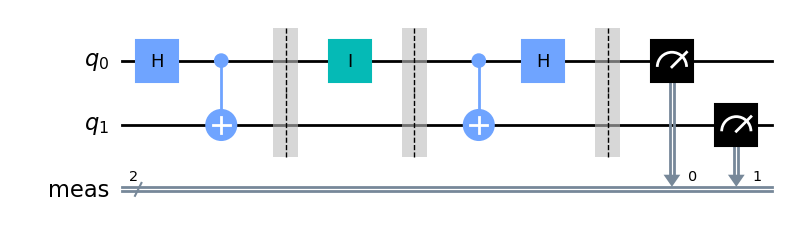

In [154]:
circuit.measure_all()
circuit.draw(output='mpl')

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_73720/3257377317.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=simulator).result()


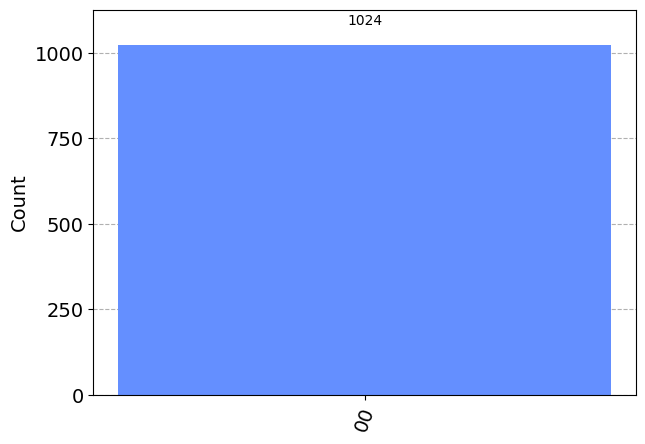

In [155]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())

### Quantum teleportation

Requires source qubit and 2 entangled qubits for transportation

In [156]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from math import pi
%matplotlib inline

/Users/uladkaminski/Projects/qc/.conda/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


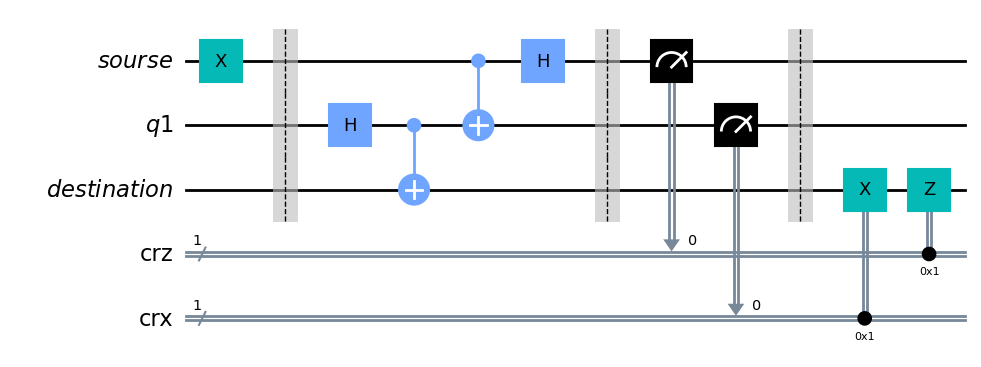

In [157]:
source = QuantumRegister(1, name='sourse')
q1 = QuantumRegister(1, name='q1')
destination = QuantumRegister(1, name='destination')

crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")

circuit = QuantumCircuit(source, q1, destination, crz, crx)

# initialize source qubit state
circuit.x(0)
circuit.barrier()

# create State Bell pair
circuit.h(q1)
circuit.cx(q1, destination)

# measure the state
circuit.cx(source, q1)
circuit.h(source)
circuit.barrier()
circuit.measure(source, crz)
circuit.measure(q1, crx)
circuit.barrier()

# transform destination the qubit based on the measured values
circuit.x(destination).c_if(crx, 1)
circuit.z(destination).c_if(crz, 1)

circuit.draw(output='mpl')

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_73720/2847517817.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  statevector = execute(circuit, backend=backend).result().get_statevector()


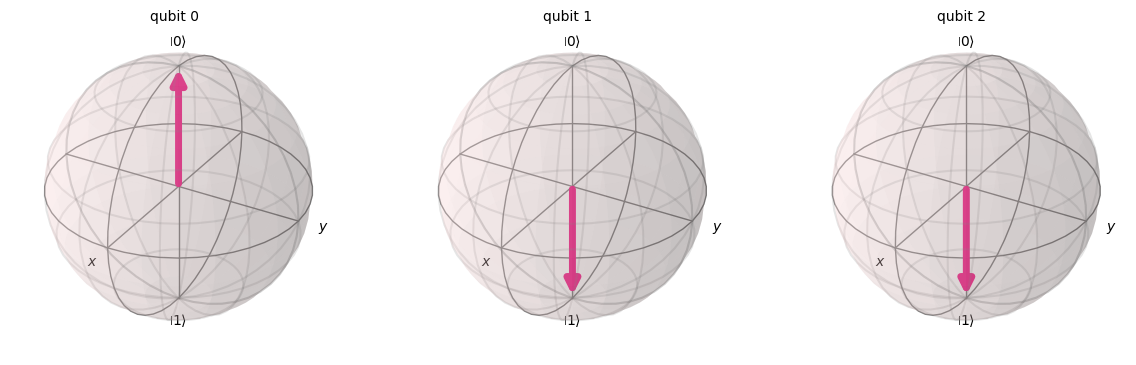

In [158]:
backend = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_73720/2339495778.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend = backend).result()


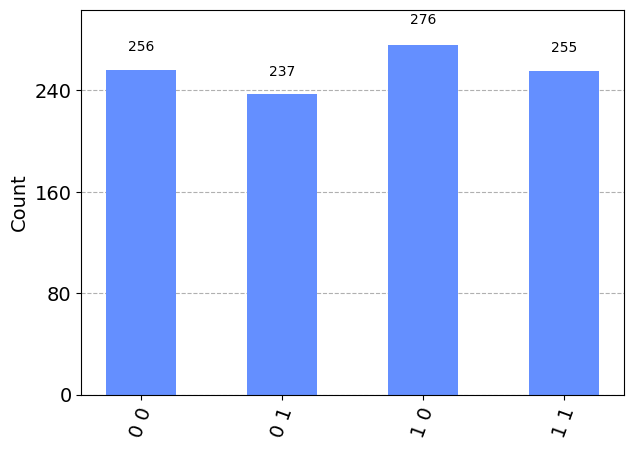

In [159]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend).result()
plot_histogram(result.get_counts())

Due to Deferred Measurement Principle we should not apply any operations after any measurements. So here is the deferred measurement approach

/Users/uladkaminski/Projects/qc/.conda/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


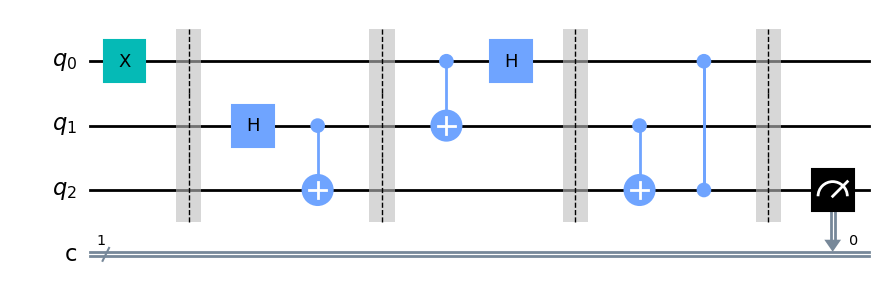

In [160]:
circuit = QuantumCircuit(3, 1)

# Initialize source qubit
circuit.x(0)
circuit.barrier()

# Bell State pair
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()

# Bell State measurements
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# Conditional operations on destination qubit
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

circuit.measure(2, 0)
circuit.draw(output='mpl')

/var/folders/8s/0mgsdm81367b1mr6dd9yxj6m0000gn/T/ipykernel_73720/1858846502.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=Aer.get_backend('qasm_simulator')).result()


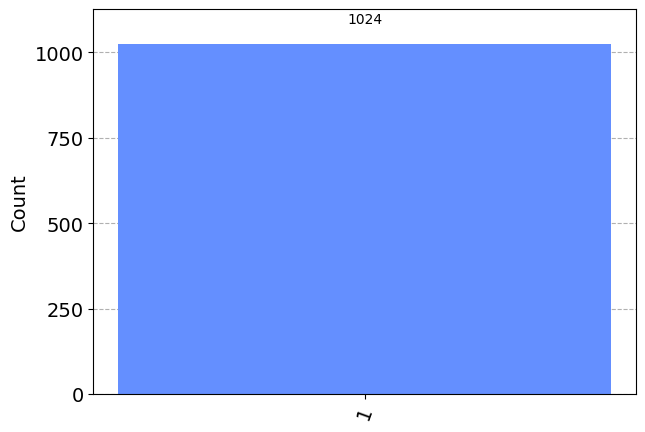

In [161]:
result = execute(circuit, backend=Aer.get_backend('qasm_simulator')).result()
plot_histogram(result.get_counts())